GLMC FOR TEXTURE EXTRACTION:

The GLCM functions characterize the texture of an image by calculating how often pairs of pixel with specific values and in a specified spatial relationship occur in an image, creating a GLCM, and then extracting statistical measures from this matrix. 


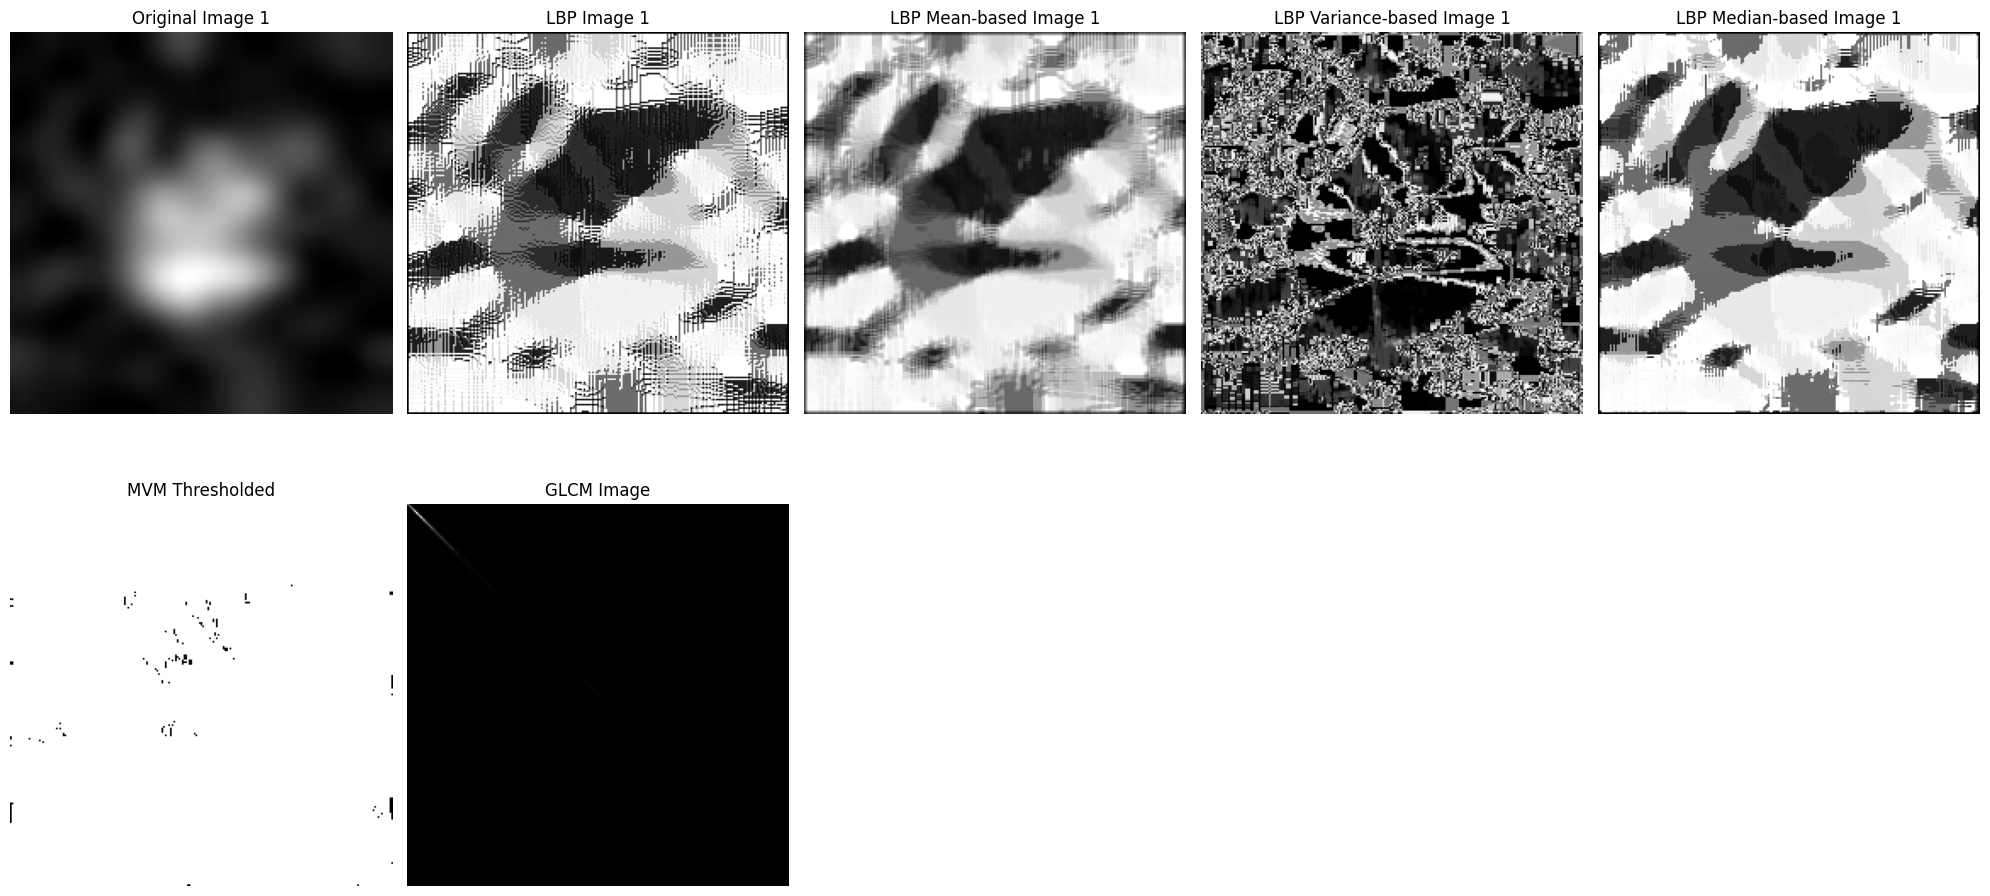

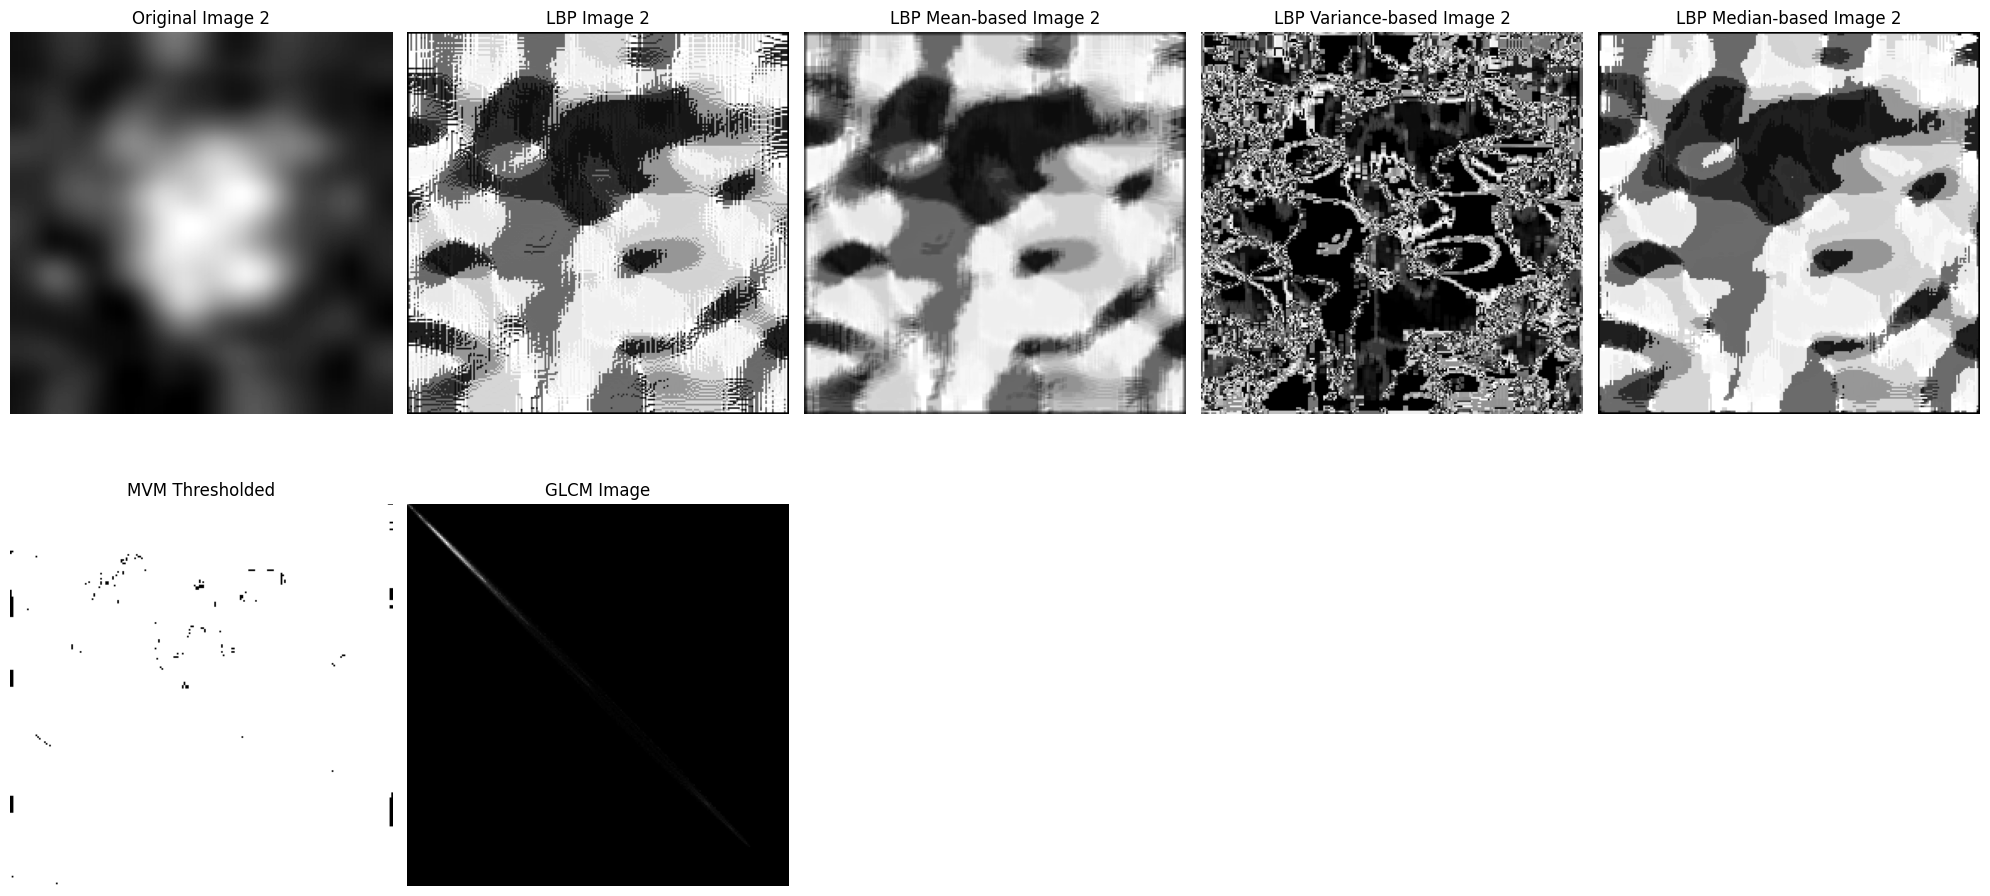

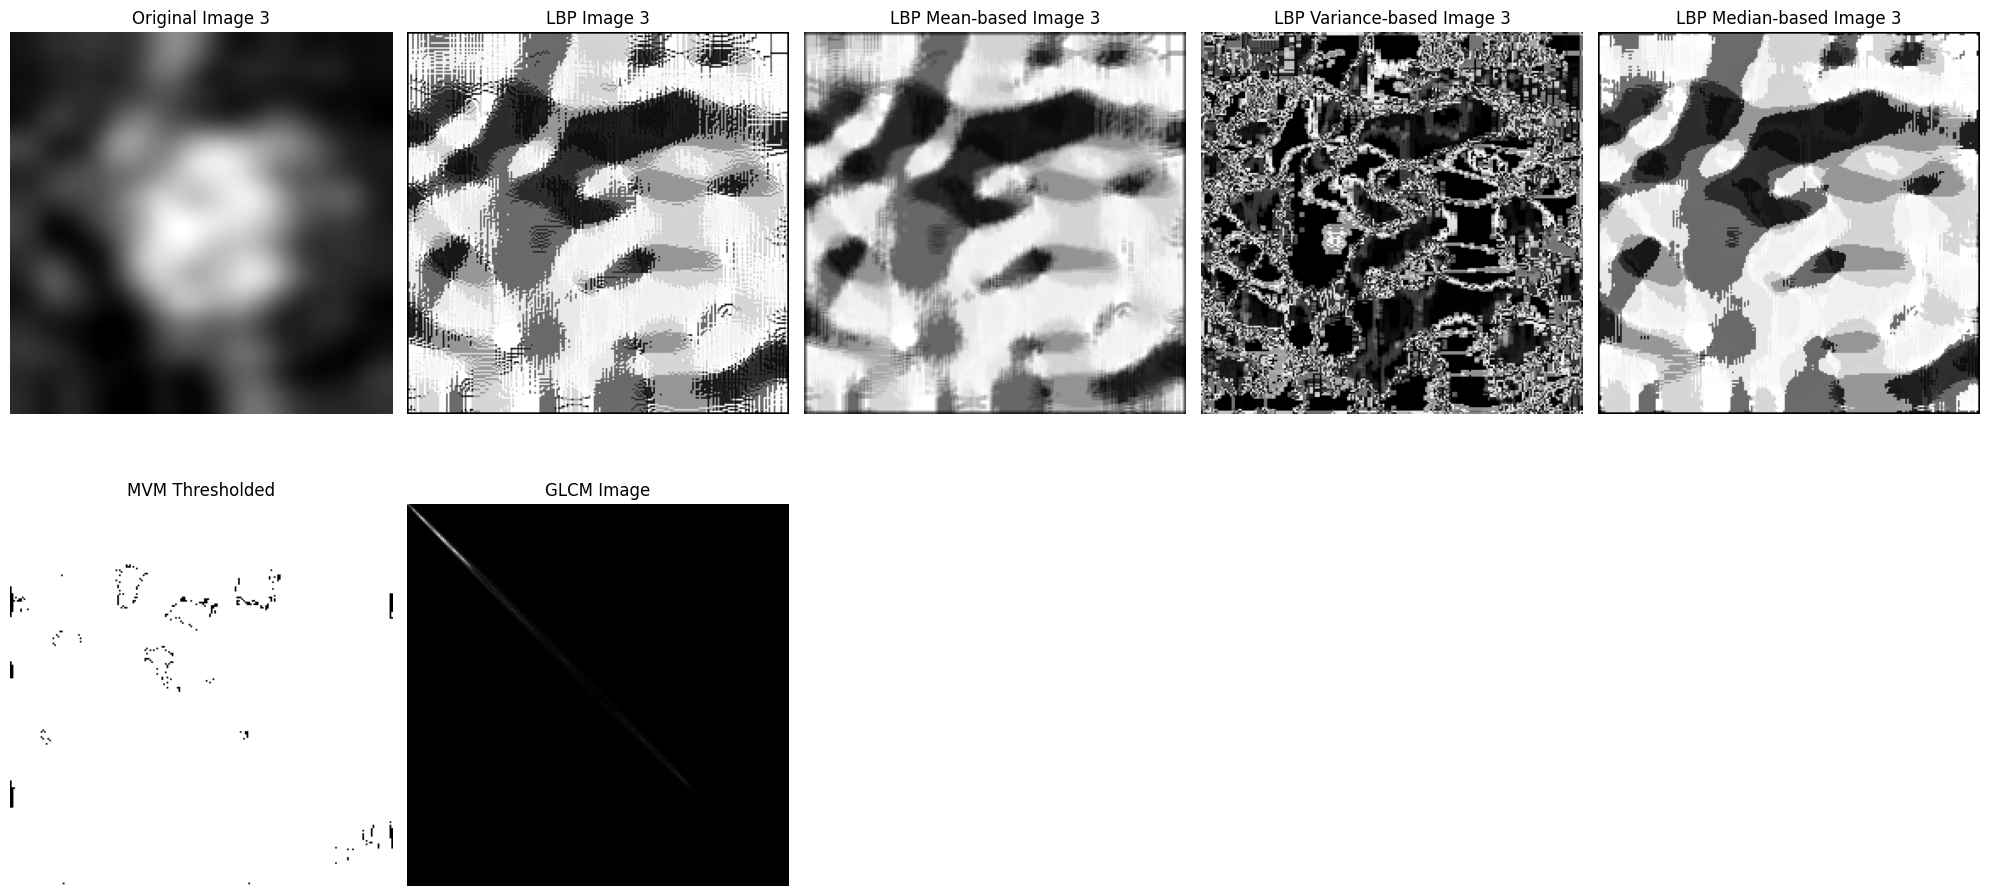

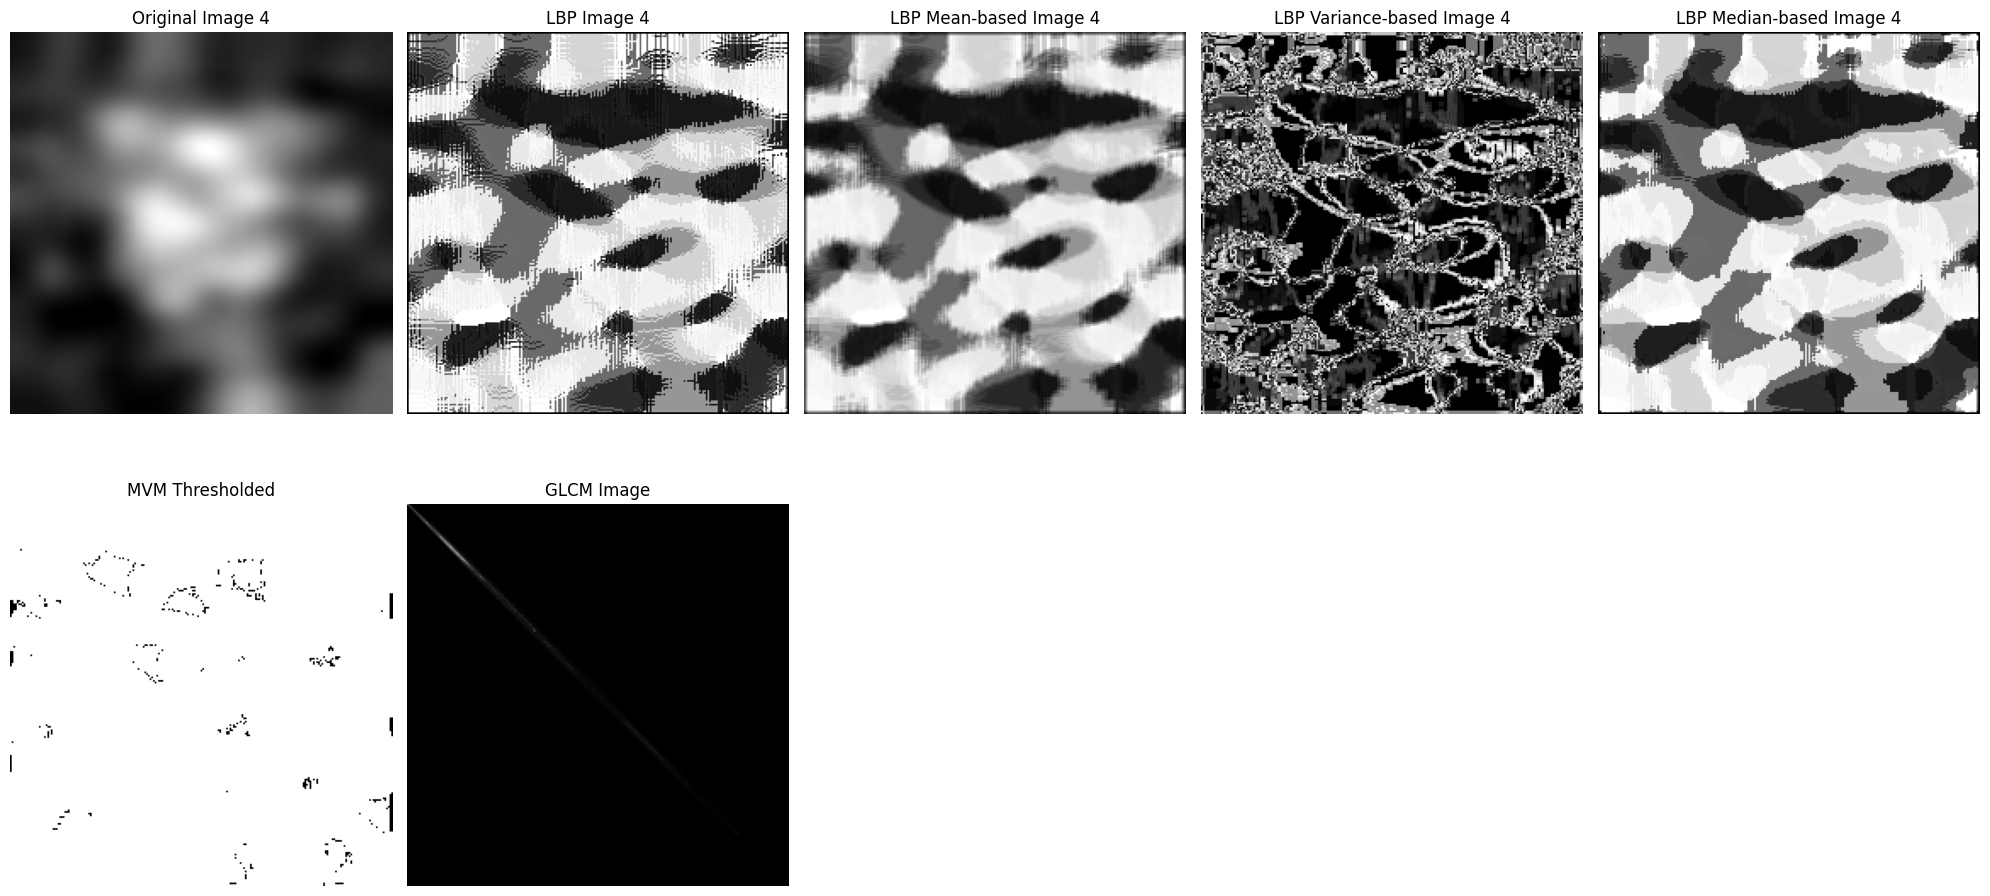

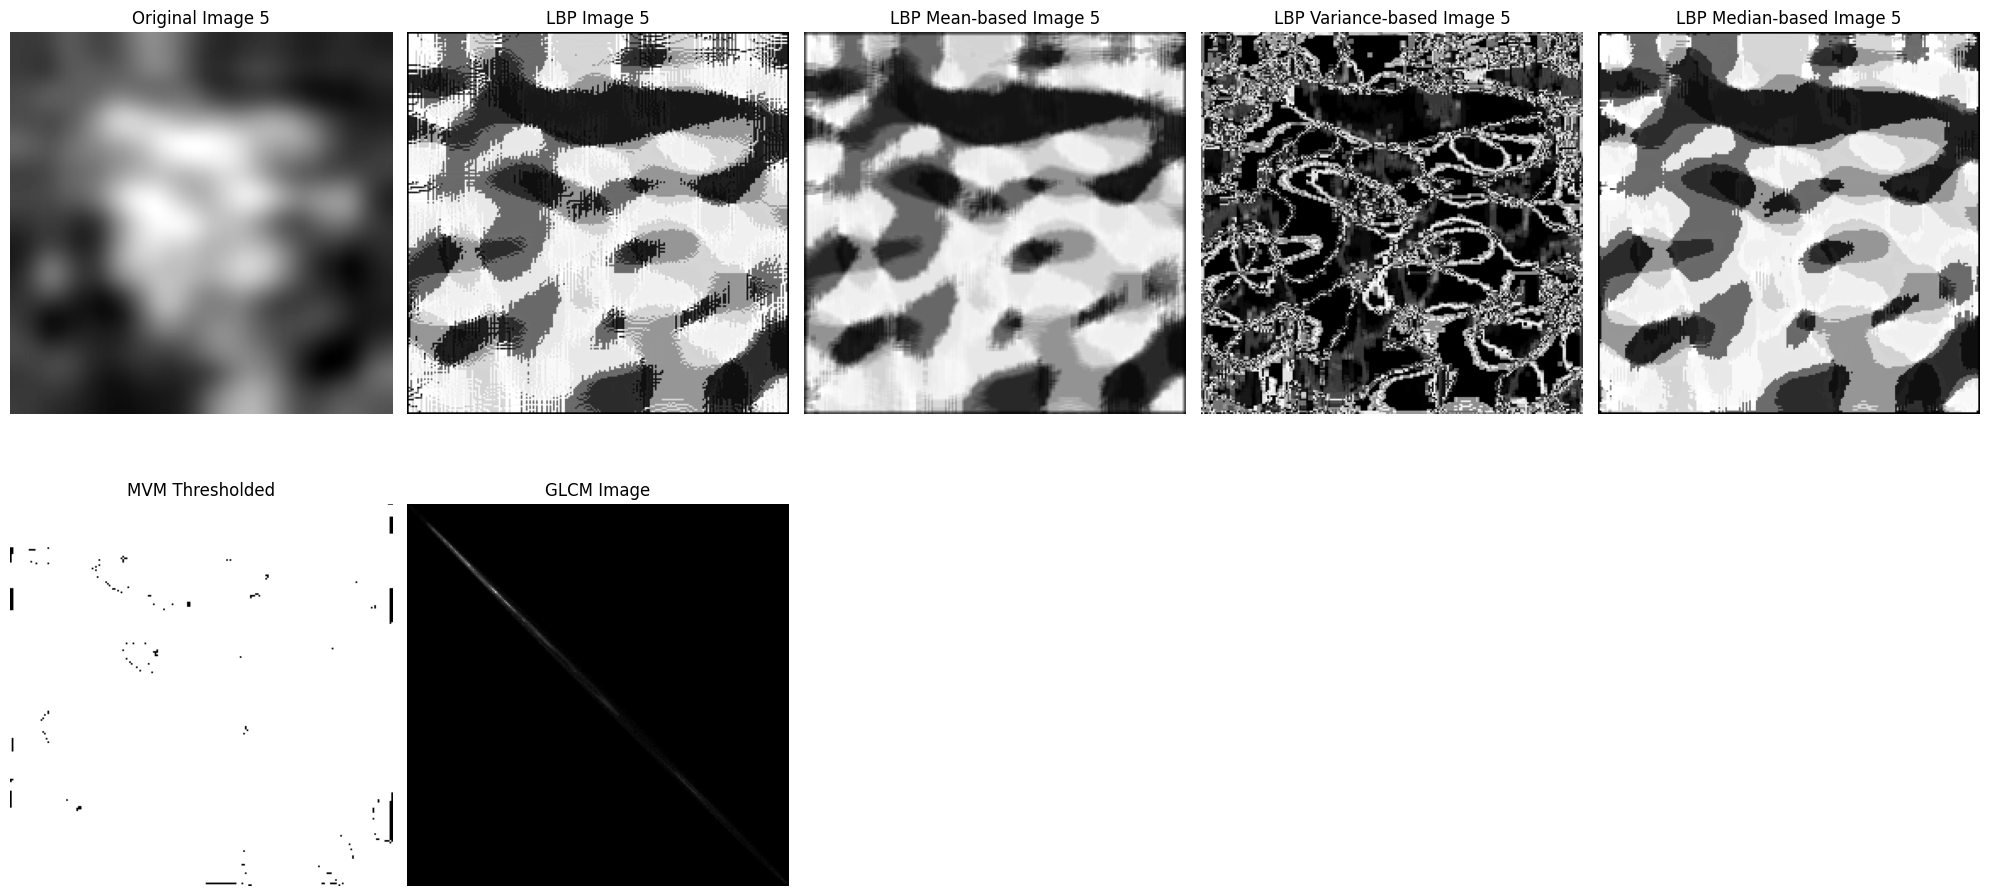

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import generic_filter
import os

# Function to normalize the image for display
def normalize_image(image):
    image_min = np.min(image)
    image_max = np.max(image)
    normalized_image = ((image - image_min) / (image_max - image_min) * 255).astype(np.uint8)
    return normalized_image

# Function to compute Local Binary Pattern (LBP)
def compute_lbp(image, radius=1, neighbors=8):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(radius, height - radius):
        for j in range(radius, width - radius):
            center_pixel = image[i, j]
            binary_string = ''
            offsets = [(dy, dx) for dy in range(-radius, radius+1) for dx in range(-radius, radius+1) if dy != 0 or dx != 0]
            for dy, dx in offsets[:neighbors]:  # Take only specified neighbors
                binary_string += '1' if image[i + dy, j + dx] >= center_pixel else '0'
            lbp_image[i, j] = int(binary_string, 2)
    
    return lbp_image

# Define functions to compute local mean, variance, and median
def local_mean(image, size=3):
    return generic_filter(image, np.mean, size=size)

def local_variance(image, size=3):
    return generic_filter(image, np.var, size=size)

def local_median(image, size=3):
    return generic_filter(image, np.median, size=size)

# Apply MVM threshold using the formula
def apply_mvm_threshold(mean_image, variance_image, median_image):
    threshold = (mean_image + np.sqrt(variance_image) + median_image) / 3
    binary_image = (mean_image > threshold) * 255
    return binary_image.astype(np.uint8)

# Function to compute GLCM manually and extract features
def compute_glcm(image, distance=1, angle=0):
    max_gray = 256
    glcm = np.zeros((max_gray, max_gray), dtype=np.int32)
    
    dx = int(np.round(np.cos(angle) * distance))
    dy = int(np.round(np.sin(angle) * distance))

    for i in range(image.shape[0] - dy):
        for j in range(image.shape[1] - dx):
            row = image[i, j]
            col = image[i + dy, j + dx]
            glcm[row, col] += 1

    return glcm

# List of image paths (replace these with paths to your images)
image_paths = [
    'test/Benign/BreaDM-Be-1810/SUB1/p-030.jpg',
    'test/Benign/BreaDM-Be-1810/SUB2/p-030.jpg',
    'test/Benign/BreaDM-Be-1810/SUB3/p-030.jpg',
    'test/Benign/BreaDM-Be-1810/SUB5/p-030.jpg',
    'test/Benign/BreaDM-Be-1810/SUB6/p-030.jpg'
]

# Directory to save output images
output_dir = "output_images"
os.makedirs(output_dir, exist_ok=True)

# Process each image in the list
for idx, image_path in enumerate(image_paths, start=1):
    # Load and resize image
    image = Image.open(image_path).convert('L')
    new_size = (225, 225)
    image_resized = image.resize(new_size, Image.LANCZOS)
    image_array = np.array(image_resized)

    # Compute LBP image
    lbp_image = compute_lbp(image_array, radius=1, neighbors=8)

    # Apply mean, variance, and median transformations to LBP image
    lbp_mean_based = local_mean(lbp_image, size=3)
    lbp_variance_based = local_variance(lbp_image, size=3)
    lbp_median_based = local_median(lbp_image, size=3)

    # Normalize for better display
    lbp_mean_based = normalize_image(lbp_mean_based)
    lbp_variance_based = normalize_image(lbp_variance_based)
    lbp_median_based = normalize_image(lbp_median_based)

    # Apply MVM threshold
    mvm_thresholded = apply_mvm_threshold(lbp_mean_based, lbp_variance_based, lbp_median_based)

    # Compute GLCM and normalize for display as an image
    glcm = compute_glcm(image_array, distance=1, angle=0)
    glcm_normalized = normalize_image(glcm)

    # Display the images and GLCM
    plt.figure(figsize=(20, 10))

    # Display original resized image
    plt.subplot(2, 5, 1)
    plt.title(f"Original Image {idx}")
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')

    # Display LBP image
    plt.subplot(2, 5, 2)
    plt.title(f"LBP Image {idx}")
    plt.imshow(lbp_image, cmap='gray')
    plt.axis('off')

    # Display LBP mean-based image
    plt.subplot(2, 5, 3)
    plt.title(f"LBP Mean-based Image {idx}")
    plt.imshow(lbp_mean_based, cmap='gray')
    plt.axis('off')

    # Display LBP variance-based image
    plt.subplot(2, 5, 4)
    plt.title(f"LBP Variance-based Image {idx}")
    plt.imshow(lbp_variance_based, cmap='gray')
    plt.axis('off')

    # Display LBP median-based image
    plt.subplot(2, 5, 5)
    plt.title(f"LBP Median-based Image {idx}")
    plt.imshow(lbp_median_based, cmap='gray')
    plt.axis('off')

    # Display MVM thresholded image
    plt.subplot(2, 5, 6)
    plt.title("MVM Thresholded")
    plt.imshow(mvm_thresholded, cmap='gray')
    plt.axis('off')

    # Display GLCM as an image
    plt.subplot(2, 5, 7)
    plt.title("GLCM Image")
    plt.imshow(glcm_normalized, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
